In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.nn import convolution, conv2d_transpose

In [15]:
N = 1000
dt = 0.01
h = 1

In [16]:
A = -np.array([[0, -1, 0, 0], [-1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0]])
B = np.array([[0, 0, -1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]]) * h
C = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [1, 0, -1, 0], [0, 0, 0, 0]]) * h
D = np.array([[0, 0, 0, 0], [0, 0, 1, 0], [0, -1, 0, 1], [0, 0, -1, 0]]) / h**2

In [17]:
_filt_0 = np.stack([B, C, D]).reshape(3,4,4,1).transpose((1, 2, 3, 0))
_filt_1 = A.reshape(1,4,4,1).transpose((1, 2, 3, 0))

jdx0=np.arange(1, 2 * N + 1, 2)
jdx1=np.arange(2, 2 * N + 1, 2)

In [18]:
_X = np.zeros(shape=(2 * N + 2, 2 * N + 2))
dX = _X * 0

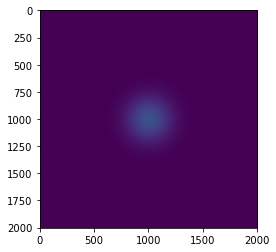

In [19]:
x = np.linspace(0,10,2002)
mesh = np.stack(np.meshgrid(x, x))

_X[jdx1.reshape(-1,1),jdx1.reshape(1,-1)] = np.exp(-np.sum(np.square(mesh-np.array([5,5]).reshape((2,1,1))), axis=0))[jdx1.reshape(-1,1),jdx1.reshape(1,-1)]

plt.imshow((_X))

In [20]:
mesh.shape

(2, 2002, 2002)

In [21]:
temp =np.arange(2 * N + 2)
hu = np.vectorize(lambda x: x % 2>0)(temp.reshape(-1,1) + temp.reshape(1,-1))
vu = np.vectorize(lambda x: x % 2==0)(temp.reshape(-1,1) + temp.reshape(1,-1))

In [22]:
_R = _X.copy()*0 + 1
_R[hu]=1000

In [23]:
mu=1
eps=1

In [25]:
filt_0= tf.constant(_filt_0, name='maxwell', dtype=tf.float64)
filt_1= tf.constant(_filt_1, name='continuity', dtype=tf.float64)
R= tf.constant(_R.reshape((1, 2 * N + 2, 2 * N + 2, 1)), name='resistance', dtype=tf.float64)
X = tf.Variable(_X.reshape((1, 2 * N + 2, 2 * N + 2, 1)), name='X', dtype=tf.float64)

In [26]:
for jter in range(10000):
    y_0 = tf.squeeze(convolution(X, filters=filt_0, strides=2, padding='VALID'))
    y_1 = tf.squeeze(convolution(X / R, filters=filt_1, strides=2, padding='VALID'))

    dX[jdx0.reshape(-1,1),jdx0.reshape(1,-1)] = y_1.numpy()
    dX[jdx0.reshape(-1,1),jdx1.reshape(1,-1)] = y_0.numpy()[:, :, 0]
    dX[jdx1.reshape(-1,1),jdx0.reshape(1,-1)] = y_0.numpy()[:, :, 1]
    dX[jdx1.reshape(-1,1),jdx1.reshape(1,-1)] = y_0.numpy()[:, :, 2]

    X.assign_add(dt * dX.reshape((1, 2 * N + 2, 2 * N + 2, 1)) / mu / eps)


KeyboardInterrupt: 

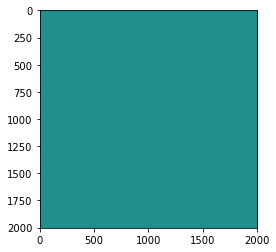

In [30]:
plt.imshow(np.squeeze(X))

In [43]:
plt.imshow(np.squeeze(y_0.numpy)[:,:,0])

IndexError: too many indices for array: array is 0-dimensional, but 3 were indexed

In [26]:
x=np.squeeze(y_0.numpy())

In [31]:
np.unique(x)

array([0.00000000e+00, 1.00003911e-06, 1.00005899e-06, ...,
       8.57272766e-03, 8.57273246e-03, 8.57315588e-03])

In [ ]:
dX

In [ ]:
tf.Session().run?

In [ ]:
tf.Session().run

In [ ]:
Z=tf.squeeze(X)

In [ ]:
tf.Tensor?

In [ ]:
Z[1::2,1::2]=y_0

In [ ]:
tf.tile?

In [ ]:
_R = _R*0

In [ ]:
_R[jdx1.reshape(-1,1), jdx1.reshape(1,-1)]=1

In [ ]:
_R

In [ ]:
y.shape

In [ ]:
x = tf.zeros(shape=(1,12,12,1), dtype=tf.float32)

In [ ]:
ff = tf.reshape(tf.constant([[0,-1],[1,0]], dtype=tf.float32), (2,2,1,1))

In [ ]:
ff

In [ ]:
y=convolution(x, ff, 'SAME')

In [ ]:
print(y)

In [ ]:
with  tf.Session() as sess:
    print(sess.run(y))

In [ ]:
y

In [ ]:
x = x_0
for jter in range(max_iter):
    